# Lucid Modelzoo

If you want to study techniques for visualizing and understanding neural networks, it's important to be able to try your experiments on multiple models.

 [Lucid](https://github.com/tensorflow/lucid) is a library for visualizing neural networks.
 As of lucid v0.3, we provide a consistent API for interacting with 27 different vision models.



## General Setup

In [0]:
# Expanded modelzoo is only available as of lucid v0.3
!pip install --quiet lucid==0.3
#tensorflow_version only works in colab
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('1')

from lucid.misc.io import show, load
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

## Import Modelzoo

In [0]:
# Lucid's modelzoo can be accessed as classes in vision_models
import lucid.modelzoo.vision_models as models

# ... or throguh a more systematic factory API
import lucid.modelzoo.nets_factory as nets

## List Models

As of lucid v0.3

In [3]:
print ""
print "Model".ljust(27), " ", "Dataset"
print ""
for name, Model in nets.models_map.iteritems():
  print name.ljust(27), " ", Model.dataset


Model                         Dataset

PnasnetMobile_slim            ImageNet
PnasnetLarge_slim             ImageNet
InceptionV1_caffe_Places365   Places365
MobilenetV1_025_slim          ImageNet
AlexNet_caffe_Places365       Places365
NasnetMobile_slim             ImageNet
InceptionV2_slim              ImageNet
ResnetV1_101_slim             ImageNet
InceptionV1_caffe             ImageNet
InceptionResnetV2_slim        ImageNet
InceptionV3_slim              ImageNet
InceptionV1_caffe_Places205   Places205
InceptionV1_slim              ImageNet
ResnetV1_50_slim              ImageNet
CaffeNet_caffe                ImageNet
InceptionV4_slim              ImageNet
VGG19_caffe                   ImageNet
ResnetV1_152_slim             ImageNet
MobilenetV1_050_slim          ImageNet
NasnetLarge_slim              ImageNet
AlexNet                       ImageNet
ResnetV2_101_slim             ImageNet
ResnetV2_152_slim             ImageNet
MobilenetV1_slim              ImageNet
VGG16_caffe          

## List Model Layers

In [4]:
models.InceptionV4_slim.layers

[{'name': 'InceptionV4/InceptionV4/Conv2d_1a_3x3/Relu',
  'size': 32,
  'type': 'conv'},
 {'name': 'InceptionV4/InceptionV4/Conv2d_2a_3x3/Relu',
  'size': 32,
  'type': 'conv'},
 {'name': 'InceptionV4/InceptionV4/Conv2d_2b_3x3/Relu',
  'size': 64,
  'type': 'conv'},
 {'name': 'InceptionV4/InceptionV4/Mixed_3a/concat',
  'size': 160,
  'type': 'conv'},
 {'name': 'InceptionV4/InceptionV4/Mixed_4a/concat',
  'size': 192,
  'type': 'conv'},
 {'name': 'InceptionV4/InceptionV4/Mixed_5a/concat',
  'size': 384,
  'type': 'conv'},
 {'name': 'InceptionV4/InceptionV4/Mixed_5b/concat',
  'size': 384,
  'type': 'conv'},
 {'name': 'InceptionV4/InceptionV4/Mixed_5c/concat',
  'size': 384,
  'type': 'conv'},
 {'name': 'InceptionV4/InceptionV4/Mixed_5d/concat',
  'size': 384,
  'type': 'conv'},
 {'name': 'InceptionV4/InceptionV4/Mixed_5e/concat',
  'size': 384,
  'type': 'conv'},
 {'name': 'InceptionV4/InceptionV4/Mixed_6a/concat',
  'size': 1024,
  'type': 'conv'},
 {'name': 'InceptionV4/InceptionV4/M

## Show Model Graph

In [5]:
model = models.InceptionV4_slim()
model.load_graphdef()

model.show_graph()

## Visualize Neuron

See the [lucid tutorial](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb) to learn more.

We pick `InceptionV4/InceptionV4/Mixed_6b/concat` from above, and chose to focus on unit 0.

512 12.305752



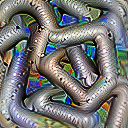

In [9]:
model = models.InceptionV4_slim()
model.load_graphdef()

_ = render.render_vis(model, "InceptionV4/InceptionV4/Mixed_6b/concat:0")

## Caricature

See the [inversion and caricature notebook](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/misc/feature_inversion_caricatures.ipynb) to learn more.


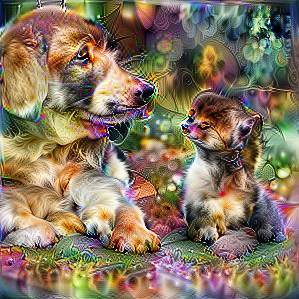

None


In [8]:
from lucid.recipes.caricature import feature_inversion

img = load("https://storage.googleapis.com/lucid-static/building-blocks/examples/dog_cat.png")

model = models.InceptionV4_slim()
model.load_graphdef()

result = feature_inversion(img, model, "InceptionV4/InceptionV4/Mixed_6b/concat", n_steps=512, cossim_pow=0.0)
show(result)